<a href="https://colab.research.google.com/github/amf60/ALURA_M5projeto-_The_road_not_taken/blob/main/M5_Part_I_Kaggle_sl_k_dataset_AMF_cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This notebook is Part I **Aldir MEDEIROS FILHO**'s project deliver to complete Module 5 of Alura Bootcamp Applied Data Science 2 - May to August 2021.

As requested by the Alura team we must work with a 'Covid-19' dataset provided by the Brazilian Hospital Group Sirio Libanes, as deposited in Kaggle. For convenience here after this original source will be refered as **<font color = 'brown'>sl_k_original'**.

For the work done on this notebook I downloaded the original raw dataset from (https://www.kaggle.com/S%C3%ADrio-Libanes/covid19) on 30 Jul 2021. The original name of dataset is 'Kaggle_Sirio_Libanes_ICU_Prediction.xlsx'

Before we start working on it, I want to record a number of important warnings about this dataset.





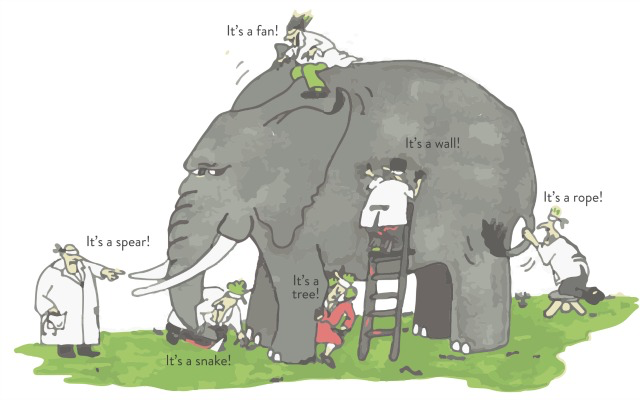

# **<font color = 'brown'>FIRST WARNING -  sl_k_original's metadata and oficial historical records of the start of this pandemic in SP**: something is wrong!!

Per [Kaggle metadata page](https://www.kaggle.com/S%C3%ADrio-Libanes/covid19/metadata) accessed on 30 Jul 21, this dataset:

* was created in 2020-04-16
* Last updated in 2020-06-22
* <font color = 'brown'>Date coverage: Temporal coverage - **2020-01-28 to 2020-04-16**

The above information must be considered in order to properly assess the context and content of the dataset and the pertinence of it for the task to be accomplished as requested per Alura and Sirio-Libanes teams.

Per example: 

* Acording to this [source](https://g1.globo.com/ciencia-e-saude/noticia/2020/02/26/ministerio-da-saude-fala-sobre-caso-possivel-paciente-com-coronavirus.ghtml) the **first officially confirmed case** of covid-19 in the city of Sao Paulo is dated **26 Feb 2021**. Therefore, the temporal coverage of the SL dataset, seems to start at least one month earlier. As we do no have dates anywhere in this dataset, it is difficult to know how many patient-Id records are potentially not covid-19 related.

* Notice also that the first [official records](https://www.seade.gov.br/coronavirus/) about the covid-19 in the state of Sao Paulo starts only on **01 April 2021**. At this date according to this official source, Brasil had 200 confirmed cases, 77% (154) of them in Sao Paulo (unclear if city or state).

<font color = 'brown'>Therefore, considering the two remarks above it is reasonable to be puzzled by the fact  that the sl_k_original dataset would have 384 patients with confirmed covid-19 up up 16 April 2021. 
 
* It is also important to point out that none of the 291 columns of this dataset is for confirmation of covid-19 diagnosis. 

* Nowhere in the Kaggle pages of this challenge it is explicitely stated that this dataset is composed only of covid-19 confirmed cases. And even more concerning, this question was not raised by any 'data cientists', aspiring or 'confirmed', in the discussions and/or codes delivered within the Kaggle project related page.

From my point of view, making assumptions that this dataset is composed entirely of confirmed cases of covid-19 is not the best start point for a clinical data science project.
 
The above is my first serious and important concern about the quality of this dataset. 

Another point of that bothers me (due to my experience in running clinical trials for AVC across European countries) is the lack of definition about the word and context of 'hospitalisation' used to for the stratification of the time_windows in the column "Window'. 

As we are going to see in another dataset in Part II, the Hospital Sirio Libanes, has at least 13 'DE ORIGENS' classifications for 'point of entrance' of a patient record. ICUs can be far, far away sometimes from different hospital units and transfer between them, particularly in a city as Sao Paulo, can be long. So, were all the 385 patients in this dataset 'hospitalised' in the imediate ICU's vinicity? 


Here after, I will 'clean' this original dataset using my expertise in clinical trials data monitoring and careful reading of the differents material presented in the Kaggle page and the of data available in this sl_k_original dataset.



In [25]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

print('Versão do pandas -> %s' % pd.__version__)
print('Versão do numpy -> %s' % np.__version__)
#print('Versão do matplotlib -> %s' % mpl.__version__)
#print('Versão do matplotlib.pyplot -> %s' % plt.__version__)
print('Versão do seaborn -> %s' % sns.__version__)

Versão do pandas -> 1.1.5
Versão do numpy -> 1.19.5
Versão do seaborn -> 0.11.1


In [26]:
sl_k_original = pd.read_excel('/content/drive/MyDrive/Alura DS Bootcamp/Modulo 5 - Colab - ML - Modelos, Metricas e Validacao/M5 - Projeto/Kaggle_Sirio_Libanes_ICU_Prediction.xlsx')

In [27]:
print('{:,} rows and {:,} cols'.format(*sl_k_original.shape))
print('{:,} unique patients'.format(sl_k_original.PATIENT_VISIT_IDENTIFIER.nunique()))

1,925 rows and 231 cols
385 unique patients


In [28]:
sl_k_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1925 entries, 0 to 1924
Columns: 231 entries, PATIENT_VISIT_IDENTIFIER to ICU
dtypes: float64(225), int64(4), object(2)
memory usage: 3.4+ MB


##Due to the large nr of columns I used pd.set_option 'max_columns' to help identify and create the cleaning block codes here after.

In [29]:
pd.set_option('max_columns', None)
sl_k_original.head()

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,HTN,IMMUNOCOMPROMISED,OTHER,ALBUMIN_MEDIAN,ALBUMIN_MEAN,ALBUMIN_MIN,ALBUMIN_MAX,ALBUMIN_DIFF,BE_ARTERIAL_MEDIAN,BE_ARTERIAL_MEAN,BE_ARTERIAL_MIN,BE_ARTERIAL_MAX,BE_ARTERIAL_DIFF,BE_VENOUS_MEDIAN,BE_VENOUS_MEAN,BE_VENOUS_MIN,BE_VENOUS_MAX,BE_VENOUS_DIFF,BIC_ARTERIAL_MEDIAN,BIC_ARTERIAL_MEAN,BIC_ARTERIAL_MIN,BIC_ARTERIAL_MAX,BIC_ARTERIAL_DIFF,BIC_VENOUS_MEDIAN,BIC_VENOUS_MEAN,BIC_VENOUS_MIN,BIC_VENOUS_MAX,BIC_VENOUS_DIFF,BILLIRUBIN_MEDIAN,BILLIRUBIN_MEAN,BILLIRUBIN_MIN,BILLIRUBIN_MAX,BILLIRUBIN_DIFF,BLAST_MEDIAN,BLAST_MEAN,BLAST_MIN,BLAST_MAX,BLAST_DIFF,CALCIUM_MEDIAN,CALCIUM_MEAN,CALCIUM_MIN,CALCIUM_MAX,CALCIUM_DIFF,CREATININ_MEDIAN,CREATININ_MEAN,CREATININ_MIN,CREATININ_MAX,CREATININ_DIFF,FFA_MEDIAN,FFA_MEAN,FFA_MIN,FFA_MAX,FFA_DIFF,GGT_MEDIAN,GGT_MEAN,GGT_MIN,GGT_MAX,GGT_DIFF,GLUCOSE_MEDIAN,GLUCOSE_MEAN,GLUCOSE_MIN,GLUCOSE_MAX,GLUCOSE_DIFF,HEMATOCRITE_MEDIAN,HEMATOCRITE_MEAN,HEMATOCRITE_MIN,HEMATOCRITE_MAX,HEMATOCRITE_DIFF,HEMOGLOBIN_MEDIAN,HEMOGLOBIN_MEAN,HEMOGLOBIN_MIN,HEMOGLOBIN_MAX,HEMOGLOBIN_DIFF,INR_MEDIAN,INR_MEAN,INR_MIN,INR_MAX,INR_DIFF,LACTATE_MEDIAN,LACTATE_MEAN,LACTATE_MIN,LACTATE_MAX,LACTATE_DIFF,LEUKOCYTES_MEDIAN,LEUKOCYTES_MEAN,LEUKOCYTES_MIN,LEUKOCYTES_MAX,LEUKOCYTES_DIFF,LINFOCITOS_MEDIAN,LINFOCITOS_MEAN,LINFOCITOS_MIN,LINFOCITOS_MAX,LINFOCITOS_DIFF,NEUTROPHILES_MEDIAN,NEUTROPHILES_MEAN,NEUTROPHILES_MIN,NEUTROPHILES_MAX,NEUTROPHILES_DIFF,P02_ARTERIAL_MEDIAN,P02_ARTERIAL_MEAN,P02_ARTERIAL_MIN,P02_ARTERIAL_MAX,P02_ARTERIAL_DIFF,P02_VENOUS_MEDIAN,P02_VENOUS_MEAN,P02_VENOUS_MIN,P02_VENOUS_MAX,P02_VENOUS_DIFF,PC02_ARTERIAL_MEDIAN,PC02_ARTERIAL_MEAN,PC02_ARTERIAL_MIN,PC02_ARTERIAL_MAX,PC02_ARTERIAL_DIFF,PC02_VENOUS_MEDIAN,PC02_VENOUS_MEAN,PC02_VENOUS_MIN,PC02_VENOUS_MAX,PC02_VENOUS_DIFF,PCR_MEDIAN,PCR_MEAN,PCR_MIN,PCR_MAX,PCR_DIFF,PH_ARTERIAL_MEDIAN,PH_ARTERIAL_MEAN,PH_ARTERIAL_MIN,PH_ARTERIAL_MAX,PH_ARTERIAL_DIFF,PH_VENOUS_MEDIAN,PH_VENOUS_MEAN,PH_VENOUS_MIN,PH_VENOUS_MAX,PH_VENOUS_DIFF,PLATELETS_MEDIAN,PLATELETS_MEAN,PLATELETS_MIN,PLATELETS_MAX,PLATELETS_DIFF,POTASSIUM_MEDIAN,POTASSIUM_MEAN,POTASSIUM_MIN,POTASSIUM_MAX,POTASSIUM_DIFF,SAT02_ARTERIAL_MEDIAN,SAT02_ARTERIAL_MEAN,SAT02_ARTERIAL_MIN,SAT02_ARTERIAL_MAX,SAT02_ARTERIAL_DIFF,SAT02_VENOUS_MEDIAN,SAT02_VENOUS_MEAN,SAT02_VENOUS_MIN,SAT02_VENOUS_MAX,SAT02_VENOUS_DIFF,SODIUM_MEDIAN,SODIUM_MEAN,SODIUM_MIN,SODIUM_MAX,SODIUM_DIFF,TGO_MEDIAN,TGO_MEAN,TGO_MIN,TGO_MAX,TGO_DIFF,TGP_MEDIAN,TGP_MEAN,TGP_MIN,TGP_MAX,TGP_DIFF,TTPA_MEDIAN,TTPA_MEAN,TTPA_MIN,TTPA_MAX,TTPA_DIFF,UREA_MEDIAN,UREA_MEAN,UREA_MIN,UREA_MAX,UREA_DIFF,DIMER_MEDIAN,DIMER_MEAN,DIMER_MIN,DIMER_MAX,DIMER_DIFF,BLOODPRESSURE_DIASTOLIC_MEAN,BLOODPRESSURE_SISTOLIC_MEAN,HEART_RATE_MEAN,RESPIRATORY_RATE_MEAN,TEMPERATURE_MEAN,OXYGEN_SATURATION_MEAN,BLOODPRESSURE_DIASTOLIC_MEDIAN,BLOODPRESSURE_SISTOLIC_MEDIAN,HEART_RATE_MEDIAN,RESPIRATORY_RATE_MEDIAN,TEMPERATURE_MEDIAN,OXYGEN_SATURATION_MEDIAN,BLOODPRESSURE_DIASTOLIC_MIN,BLOODPRESSURE_SISTOLIC_MIN,HEART_RATE_MIN,RESPIRATORY_RATE_MIN,TEMPERATURE_MIN,OXYGEN_SATURATION_MIN,BLOODPRESSURE_DIASTOLIC_MAX,BLOODPRESSURE_SISTOLIC_MAX,HEART_RATE_MAX,RESPIRATORY_RATE_MAX,TEMPERATURE_MAX,OXYGEN_SATURATION_MAX,BLOODPRESSURE_DIASTOLIC_DIFF,BLOODPRESSURE_SISTOLIC_DIFF,HEART_RATE_DIFF,RESPIRATORY_RATE_DIFF,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,WINDOW,ICU
0,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

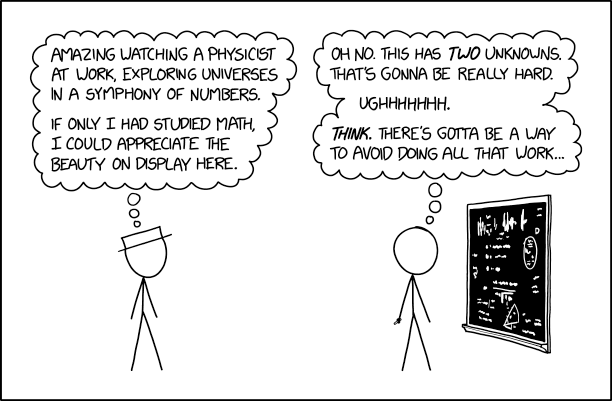



In clinical trials, we have very well thought and clear guidelines to secure anonymisation of all clinical data from a patient. (ICH - GCP). One key point is that we NEVER modify the original values of any kind of assessment(Lab results, Vital Signs, Imaging reports, clinical assessments, etc, etc, etc). 

The reader may find some useful adicional information on this [source](https://www.ema.europa.eu/en/documents/report/report-data-anonymisation-key-enabler-clinical-data-sharing_en.pdf)

#**A) Patient previous grouped diseases - 09 columns**

The way this was 'anonymised' is a nonsense. Look how this smart teenager from India was able to find and post in the same [SL Kaggle challenge](https://www.kaggle.com/aestheteaman01/home-hospital-occupancy-monitoring-evaluation) a WHO dataset from the same period with detailed data about the patients symptoms in China. That is useful information!!!! 

Therefore, from the grouped diseases I will keep only the 'Imunocompromised' column as it has no ambiguity of its meaning. I was briefly tempted to keep 'HTN", but as it is unclear if it would mean 'Hypertension' or '[Hypotension](https://en.wikipedia.org/wiki/Hypotension)' so it will also be deleted.

In [30]:
sl_k_a = sl_k_original.drop(labels= ['DISEASE GROUPING 1','DISEASE GROUPING 2','DISEASE GROUPING 3','DISEASE GROUPING 4','DISEASE GROUPING 5','DISEASE GROUPING 6','HTN','OTHER'], axis = 1)
sl_k_a

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,AGE_PERCENTIL,GENDER,IMMUNOCOMPROMISED,ALBUMIN_MEDIAN,ALBUMIN_MEAN,ALBUMIN_MIN,ALBUMIN_MAX,ALBUMIN_DIFF,BE_ARTERIAL_MEDIAN,BE_ARTERIAL_MEAN,BE_ARTERIAL_MIN,BE_ARTERIAL_MAX,BE_ARTERIAL_DIFF,BE_VENOUS_MEDIAN,BE_VENOUS_MEAN,BE_VENOUS_MIN,BE_VENOUS_MAX,BE_VENOUS_DIFF,BIC_ARTERIAL_MEDIAN,BIC_ARTERIAL_MEAN,BIC_ARTERIAL_MIN,BIC_ARTERIAL_MAX,BIC_ARTERIAL_DIFF,BIC_VENOUS_MEDIAN,BIC_VENOUS_MEAN,BIC_VENOUS_MIN,BIC_VENOUS_MAX,BIC_VENOUS_DIFF,BILLIRUBIN_MEDIAN,BILLIRUBIN_MEAN,BILLIRUBIN_MIN,BILLIRUBIN_MAX,BILLIRUBIN_DIFF,BLAST_MEDIAN,BLAST_MEAN,BLAST_MIN,BLAST_MAX,BLAST_DIFF,CALCIUM_MEDIAN,CALCIUM_MEAN,CALCIUM_MIN,CALCIUM_MAX,CALCIUM_DIFF,CREATININ_MEDIAN,CREATININ_MEAN,CREATININ_MIN,CREATININ_MAX,CREATININ_DIFF,FFA_MEDIAN,FFA_MEAN,FFA_MIN,FFA_MAX,FFA_DIFF,GGT_MEDIAN,GGT_MEAN,GGT_MIN,GGT_MAX,GGT_DIFF,GLUCOSE_MEDIAN,GLUCOSE_MEAN,GLUCOSE_MIN,GLUCOSE_MAX,GLUCOSE_DIFF,HEMATOCRITE_MEDIAN,HEMATOCRITE_MEAN,HEMATOCRITE_MIN,HEMATOCRITE_MAX,HEMATOCRITE_DIFF,HEMOGLOBIN_MEDIAN,HEMOGLOBIN_MEAN,HEMOGLOBIN_MIN,HEMOGLOBIN_MAX,HEMOGLOBIN_DIFF,INR_MEDIAN,INR_MEAN,INR_MIN,INR_MAX,INR_DIFF,LACTATE_MEDIAN,LACTATE_MEAN,LACTATE_MIN,LACTATE_MAX,LACTATE_DIFF,LEUKOCYTES_MEDIAN,LEUKOCYTES_MEAN,LEUKOCYTES_MIN,LEUKOCYTES_MAX,LEUKOCYTES_DIFF,LINFOCITOS_MEDIAN,LINFOCITOS_MEAN,LINFOCITOS_MIN,LINFOCITOS_MAX,LINFOCITOS_DIFF,NEUTROPHILES_MEDIAN,NEUTROPHILES_MEAN,NEUTROPHILES_MIN,NEUTROPHILES_MAX,NEUTROPHILES_DIFF,P02_ARTERIAL_MEDIAN,P02_ARTERIAL_MEAN,P02_ARTERIAL_MIN,P02_ARTERIAL_MAX,P02_ARTERIAL_DIFF,P02_VENOUS_MEDIAN,P02_VENOUS_MEAN,P02_VENOUS_MIN,P02_VENOUS_MAX,P02_VENOUS_DIFF,PC02_ARTERIAL_MEDIAN,PC02_ARTERIAL_MEAN,PC02_ARTERIAL_MIN,PC02_ARTERIAL_MAX,PC02_ARTERIAL_DIFF,PC02_VENOUS_MEDIAN,PC02_VENOUS_MEAN,PC02_VENOUS_MIN,PC02_VENOUS_MAX,PC02_VENOUS_DIFF,PCR_MEDIAN,PCR_MEAN,PCR_MIN,PCR_MAX,PCR_DIFF,PH_ARTERIAL_MEDIAN,PH_ARTERIAL_MEAN,PH_ARTERIAL_MIN,PH_ARTERIAL_MAX,PH_ARTERIAL_DIFF,PH_VENOUS_MEDIAN,PH_VENOUS_MEAN,PH_VENOUS_MIN,PH_VENOUS_MAX,PH_VENOUS_DIFF,PLATELETS_MEDIAN,PLATELETS_MEAN,PLATELETS_MIN,PLATELETS_MAX,PLATELETS_DIFF,POTASSIUM_MEDIAN,POTASSIUM_MEAN,POTASSIUM_MIN,POTASSIUM_MAX,POTASSIUM_DIFF,SAT02_ARTERIAL_MEDIAN,SAT02_ARTERIAL_MEAN,SAT02_ARTERIAL_MIN,SAT02_ARTERIAL_MAX,SAT02_ARTERIAL_DIFF,SAT02_VENOUS_MEDIAN,SAT02_VENOUS_MEAN,SAT02_VENOUS_MIN,SAT02_VENOUS_MAX,SAT02_VENOUS_DIFF,SODIUM_MEDIAN,SODIUM_MEAN,SODIUM_MIN,SODIUM_MAX,SODIUM_DIFF,TGO_MEDIAN,TGO_MEAN,TGO_MIN,TGO_MAX,TGO_DIFF,TGP_MEDIAN,TGP_MEAN,TGP_MIN,TGP_MAX,TGP_DIFF,TTPA_MEDIAN,TTPA_MEAN,TTPA_MIN,TTPA_MAX,TTPA_DIFF,UREA_MEDIAN,UREA_MEAN,UREA_MIN,UREA_MAX,UREA_DIFF,DIMER_MEDIAN,DIMER_MEAN,DIMER_MIN,DIMER_MAX,DIMER_DIFF,BLOODPRESSURE_DIASTOLIC_MEAN,BLOODPRESSURE_SISTOLIC_MEAN,HEART_RATE_MEAN,RESPIRATORY_RATE_MEAN,TEMPERATURE_MEAN,OXYGEN_SATURATION_MEAN,BLOODPRESSURE_DIASTOLIC_MEDIAN,BLOODPRESSURE_SISTOLIC_MEDIAN,HEART_RATE_MEDIAN,RESPIRATORY_RATE_MEDIAN,TEMPERATURE_MEDIAN,OXYGEN_SATURATION_MEDIAN,BLOODPRESSURE_DIASTOLIC_MIN,BLOODPRESSURE_SISTOLIC_MIN,HEART_RATE_MIN,RESPIRATORY_RATE_MIN,TEMPERATURE_MIN,OXYGEN_SATURATION_MIN,BLOODPRESSURE_DIASTOLIC_MAX,BLOODPRESSURE_SISTOLIC_MAX,HEART_RATE_MAX,RESPIRATORY_RATE_MAX,TEMPERATURE_MAX,OXYGEN_SATURATION_MAX,BLOODPRESSURE_DIASTOLIC_DIFF,BLOODPRESSURE_SISTOLIC_DIFF,HEART_RATE_DIFF,RESPIRATORY_RATE_DIFF,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,WINDOW,ICU
0,0,1,60th,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

#B) **Blood results  - 180 columns** (36 original * 5 (median, mean, max, min and dif))

To start - present the lab values in an alphabetical order is absolutely ridiculous, particularly if we consider that this dataset was destined mainly to people without medical knowledge. They should have at least separated the hemaetology tests from the arterial and Venous blood gaz tests.

('**: per Kaggle description 'In total there are 54 features, expanded when pertinent to the median, mean, max, min and diff.

diff = max - min
relative diff = diff/median"

A simple 'eye check' shows that the all the values for the same parameter are exactly the same. Not surprise as it would be exceptional to have more than one lab sample analysed within two hours. 

Therefore, I first deleted the unnecessary 144 columns (36 * 4(max, min and dif)) columns and only keeping, for the moment, the lab parameters with the ''_MEDIAN'', for further exploration in the next code block.

Blood test (https://en.wikipedia.org/wiki/Blood_test)
Arterial blood gas test (https://en.wikipedia.org/wiki/Arterial_blood_gas_test)

In [31]:
sl_k_ab = sl_k_a.drop(['ALBUMIN_MEAN', 'ALBUMIN_MIN', 'ALBUMIN_MAX', 'ALBUMIN_DIFF', 
'BE_ARTERIAL_MEAN', 'BE_ARTERIAL_MIN', 'BE_ARTERIAL_MAX',	'BE_ARTERIAL_DIFF',		
'BE_VENOUS_MEAN', 'BE_VENOUS_MIN', 'BE_VENOUS_MAX', 'BE_VENOUS_DIFF',	
'BIC_ARTERIAL_MEAN', 'BIC_ARTERIAL_MIN', 'BIC_ARTERIAL_MAX', 'BIC_ARTERIAL_DIFF',		
'BIC_VENOUS_MEAN', 'BIC_VENOUS_MIN', 'BIC_VENOUS_MAX', 'BIC_VENOUS_DIFF',
'BILLIRUBIN_MEAN', 'BILLIRUBIN_MIN', 'BILLIRUBIN_MAX', 'BILLIRUBIN_DIFF',
'BLAST_MEAN', 'BLAST_MIN', 'BLAST_MAX', 'BLAST_DIFF',	
'CALCIUM_MEAN', 'CALCIUM_MIN', 'CALCIUM_MAX', 'CALCIUM_DIFF',
'CREATININ_MEAN', 'CREATININ_MIN', 'CREATININ_MAX', 'CREATININ_DIFF',
'FFA_MEAN', 'FFA_MIN', 'FFA_MAX', 'FFA_DIFF',
'GGT_MEAN', 'GGT_MIN', 'GGT_MAX', 'GGT_DIFF',
'GLUCOSE_MEAN', 'GLUCOSE_MIN', 'GLUCOSE_MAX', 'GLUCOSE_DIFF',
'HEMATOCRITE_MEAN', 'HEMATOCRITE_MIN', 'HEMATOCRITE_MAX', 'HEMATOCRITE_DIFF',	
'HEMOGLOBIN_MEAN', 'HEMOGLOBIN_MIN', 'HEMOGLOBIN_MAX', 'HEMOGLOBIN_DIFF',
'INR_MEAN', 'INR_MIN', 'INR_MAX', 'INR_DIFF',
'LACTATE_MEAN', 'LACTATE_MIN', 'LACTATE_MAX', 'LACTATE_DIFF',
'LEUKOCYTES_MEAN', 'LEUKOCYTES_MIN', 'LEUKOCYTES_MAX', 'LEUKOCYTES_DIFF',
'LINFOCITOS_MEAN', 'LINFOCITOS_MIN', 'LINFOCITOS_MAX', 'LINFOCITOS_DIFF',	
'NEUTROPHILES_MEAN', 'NEUTROPHILES_MIN', 'NEUTROPHILES_MAX', 'NEUTROPHILES_DIFF',
'P02_ARTERIAL_MEAN', 'P02_ARTERIAL_MIN', 'P02_ARTERIAL_MAX', 'P02_ARTERIAL_DIFF',	
'P02_VENOUS_MEAN', 'P02_VENOUS_MIN', 'P02_VENOUS_MAX', 'P02_VENOUS_DIFF',	
'PC02_ARTERIAL_MEAN', 'PC02_ARTERIAL_MIN', 'PC02_ARTERIAL_MAX', 'PC02_ARTERIAL_DIFF',		
'PC02_VENOUS_MEAN', 'PC02_VENOUS_MIN', 'PC02_VENOUS_MAX', 'PC02_VENOUS_DIFF',	
'PCR_MEAN', 'PCR_MIN', 'PCR_MAX', 'PCR_DIFF',
'PH_ARTERIAL_MEAN', 'PH_ARTERIAL_MIN', 'PH_ARTERIAL_MAX', 'PH_ARTERIAL_DIFF',	
'PH_VENOUS_MEAN', 'PH_VENOUS_MIN', 'PH_VENOUS_MAX', 'PH_VENOUS_DIFF',	
'PLATELETS_MEAN', 'PLATELETS_MIN', 'PLATELETS_MAX', 'PLATELETS_DIFF',	
'POTASSIUM_MEAN', 'POTASSIUM_MIN', 'POTASSIUM_MAX', 'POTASSIUM_DIFF',
'SAT02_ARTERIAL_MEAN', 'SAT02_ARTERIAL_MIN', 'SAT02_ARTERIAL_MAX', 'SAT02_ARTERIAL_DIFF',		
'SAT02_VENOUS_MEAN', 'SAT02_VENOUS_MIN', 'SAT02_VENOUS_MAX', 'SAT02_VENOUS_DIFF',	
'SODIUM_MEAN', 'SODIUM_MIN', 'SODIUM_MAX', 'SODIUM_DIFF',		
'TGO_MEAN', 'TGO_MIN', 'TGO_MAX', 'TGO_DIFF',	
'TGP_MEAN', 'TGP_MIN', 'TGP_MAX', 'TGP_DIFF',	
'TTPA_MEAN', 'TTPA_MIN', 'TTPA_MAX', 'TTPA_DIFF',	
'UREA_MEAN', 'UREA_MIN', 'UREA_MAX', 'UREA_DIFF',	
'DIMER_MEAN', 'DIMER_MIN', 'DIMER_MAX', 'DIMER_DIFF'], axis=1)

In [32]:
sl_k_ab

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,AGE_PERCENTIL,GENDER,IMMUNOCOMPROMISED,ALBUMIN_MEDIAN,BE_ARTERIAL_MEDIAN,BE_VENOUS_MEDIAN,BIC_ARTERIAL_MEDIAN,BIC_VENOUS_MEDIAN,BILLIRUBIN_MEDIAN,BLAST_MEDIAN,CALCIUM_MEDIAN,CREATININ_MEDIAN,FFA_MEDIAN,GGT_MEDIAN,GLUCOSE_MEDIAN,HEMATOCRITE_MEDIAN,HEMOGLOBIN_MEDIAN,INR_MEDIAN,LACTATE_MEDIAN,LEUKOCYTES_MEDIAN,LINFOCITOS_MEDIAN,NEUTROPHILES_MEDIAN,P02_ARTERIAL_MEDIAN,P02_VENOUS_MEDIAN,PC02_ARTERIAL_MEDIAN,PC02_VENOUS_MEDIAN,PCR_MEDIAN,PH_ARTERIAL_MEDIAN,PH_VENOUS_MEDIAN,PLATELETS_MEDIAN,POTASSIUM_MEDIAN,SAT02_ARTERIAL_MEDIAN,SAT02_VENOUS_MEDIAN,SODIUM_MEDIAN,TGO_MEDIAN,TGP_MEDIAN,TTPA_MEDIAN,UREA_MEDIAN,DIMER_MEDIAN,BLOODPRESSURE_DIASTOLIC_MEAN,BLOODPRESSURE_SISTOLIC_MEAN,HEART_RATE_MEAN,RESPIRATORY_RATE_MEAN,TEMPERATURE_MEAN,OXYGEN_SATURATION_MEAN,BLOODPRESSURE_DIASTOLIC_MEDIAN,BLOODPRESSURE_SISTOLIC_MEDIAN,HEART_RATE_MEDIAN,RESPIRATORY_RATE_MEDIAN,TEMPERATURE_MEDIAN,OXYGEN_SATURATION_MEDIAN,BLOODPRESSURE_DIASTOLIC_MIN,BLOODPRESSURE_SISTOLIC_MIN,HEART_RATE_MIN,RESPIRATORY_RATE_MIN,TEMPERATURE_MIN,OXYGEN_SATURATION_MIN,BLOODPRESSURE_DIASTOLIC_MAX,BLOODPRESSURE_SISTOLIC_MAX,HEART_RATE_MAX,RESPIRATORY_RATE_MAX,TEMPERATURE_MAX,OXYGEN_SATURATION_MAX,BLOODPRESSURE_DIASTOLIC_DIFF,BLOODPRESSURE_SISTOLIC_DIFF,HEART_RATE_DIFF,RESPIRATORY_RATE_DIFF,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,WINDOW,ICU
0,0,1,60th,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.086420,-0.230769,-0.283019,-0.593220,-0.285714,0.736842,0.086420,-0.230769,-0.283019,-0.586207,-0.285714,0.736842,0.237113,0.0000,-0.162393,-0.500000,0.208791,0.898990,-0.247863,-0.459459,-0.432836,-0.636364,-0.420290,0.736842,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0-2,0
1,0,1,60th,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.333333,-0.230769,-0.132075,-0.593220,0.535714,0.578947,0.333333,-0.230769,-0.132075,-0.586207,0.535714,0.578947,0.443299,0.0000,-0.025641,-0.500000,0.714286,0.838384,-0.076923,-0.459459,-0.313433,-0.636364,0.246377,0.578947,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,2-4,0
2,0,1,60th,0,0.0,0.605263,-1.000000,-1.000000,-0.317073,-0.317073,-0.938950,-1.0,0.183673,-0.868365,-0.742004,-0.945093,-0.891993,0.090147,0.109756,-0.932246,1.000000,-0.835844,-0.914938,-0.868747,-0.170732,-0.704142,-0.779310,-0.754601,-0.875236,0.234043,0.363636,-0.540721,-0.518519,0.939394,0.345679,-0.028571,-0.997201,-0.990854,-0.825613,-0.836145,-0.994912,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4-6,0
3,0,1,60th,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.107143,0.736842,NaN,NaN,NaN,NaN,-0.107143,0.736842,NaN,NaN,NaN,NaN,0.318681,0.898990,NaN,NaN,NaN,NaN,-0.275362,0.736842,NaN,NaN,NaN,NaN,-1.000000,-1.000000,NaN,NaN,NaN,NaN,-1.000000,-1.000000,6-12,0
4,0,1,60th,0,0.0,0.000000,-0.871658,-0.863874,-0.317073,-0.414634,-0.979069,-1.0,0.326531,-0.926398,-0.859275,-0.669393,-0.891993,-0.320755,-0.353659,-0.979925,-0.963023,-0.762843,-0.643154,-0.868747,-0.365854,-0.230769,-0.875862,-0.815951,-1.000000,0.574468,0.393939,-0.471295,-0.666667,0.848485,0.925926,0.142857,-0.999067,-0.983994,-0.846633,-0.836145,-0.996762,-0.243021,-0.338537,-0.213031,-0.317859,0.033779,0.665932,-0.283951,-0.376923,-0.188679,-0.379310,0.035714,0.631579,-0.340206,-0.4875,-0.572650,-0.857143,0.098901,0.797980,-0.076923,0.286486,0.298507,0.272727,0

After close look at remaining (ie"Median") lab results of sl_k_ab, and some thinking I fell obliged to also delete those columns.

Rational: According to kaggle's documentation, 'data has been cleaned and scaled by column according to Min Max Scaler to fit between -1 and 1.'

However, it does not say at all what the lab units are and if the lab results 'when cleaned and scaled' were adjusted by sex, age (check age_percentil here after) and previous conditions. 

Any clinical inference done on these data as preented would be utter wild speculation. 

The work of a clinical data cientist for an so important project must not be based on undocumented assumptions and wild guess.

Therefore, I am again obliged to delete the remaining lab values

**<font color = 'red'>Another interesting fact:**

Out of the 163 patients who were transfered to ICU beyound the 2 hours window, blood samples were done and available for only 36 patients(or 22% of them) the time window that preceed the transfer to ICU. From my point of view this fact is an additional rational to eliminate all those 'anonymised' blood samples values as they do not have any kind of clinical predicability value for analysis.


In [33]:
sl_k_abc = sl_k_ab.drop(['ALBUMIN_MEDIAN', 
                         'BE_ARTERIAL_MEDIAN',
                         'BE_VENOUS_MEDIAN',
                         'BIC_ARTERIAL_MEDIAN',
                         'BIC_VENOUS_MEDIAN','BILLIRUBIN_MEDIAN',
                         'BLAST_MEDIAN',
                         'CALCIUM_MEDIAN','CREATININ_MEDIAN',
                         'FFA_MEDIAN',
                         'GGT_MEDIAN','GLUCOSE_MEDIAN',
                         'HEMATOCRITE_MEDIAN', 'HEMOGLOBIN_MEDIAN',
                         'INR_MEDIAN',
                         'LACTATE_MEDIAN','LEUKOCYTES_MEDIAN','LINFOCITOS_MEDIAN',
                         'NEUTROPHILES_MEDIAN',
                         'P02_ARTERIAL_MEDIAN','P02_VENOUS_MEDIAN','PC02_ARTERIAL_MEDIAN','PC02_VENOUS_MEDIAN',
                         'PCR_MEDIAN',
                         'PH_ARTERIAL_MEDIAN','PH_VENOUS_MEDIAN',
                         'PLATELETS_MEDIAN','POTASSIUM_MEDIAN',
                         'SAT02_ARTERIAL_MEDIAN','SAT02_VENOUS_MEDIAN',
                         'SODIUM_MEDIAN',
                         'TGO_MEDIAN','TGP_MEDIAN','TTPA_MEDIAN',
                         'UREA_MEDIAN',
                         'DIMER_MEDIAN'], axis=1)

#**C) Vital signs - 36 columns** (6 original * 6 ( mean, median, min, max, diff and diff_rel))

According to kaggle, 'data has been cleaned and scaled by column according to Min Max Scaler to fit between -1 and 1.'

Again, based on my 25 years of clinical trial data monitoring, I frankly doubt that this set of Vital Signs data was 'cleaned' in a so short period of time. Also the 'Min Max Scaler to fit between -1 and 1' is utterly ridiculous as it does not clear state what is the baseline value for a measurement. Per example:  for Temperature? 36 C Degrees or the patient temperature when patient was hospitalized, or based on the previous measurement? 

Notice also, that a naked eye check shows that Mean Oxygen Blood Saturation is lower, sometimes much lower, than the Min Blood Saturation, for ALL the patients. This make this important data parameter for diagnositc totally untrhustful.

Due to total lack of information provided by the authors about how the data was cleaned and scaled, any inference about these data would be spurious speculation. Therefore, I am obliged to delete all the 36 columns of SV data, as they are totally unreliable from the clinical point of view.



In [34]:
sl_k_abcd = sl_k_abc.drop(['BLOODPRESSURE_DIASTOLIC_MEAN',	'BLOODPRESSURE_SISTOLIC_MEAN',	'HEART_RATE_MEAN',	'RESPIRATORY_RATE_MEAN',	'TEMPERATURE_MEAN',	'OXYGEN_SATURATION_MEAN',	'BLOODPRESSURE_DIASTOLIC_MEDIAN',	'BLOODPRESSURE_SISTOLIC_MEDIAN',	'HEART_RATE_MEDIAN',	'RESPIRATORY_RATE_MEDIAN',	'TEMPERATURE_MEDIAN',	'OXYGEN_SATURATION_MEDIAN',	'BLOODPRESSURE_DIASTOLIC_MIN',	'BLOODPRESSURE_SISTOLIC_MIN',	'HEART_RATE_MIN',	'RESPIRATORY_RATE_MIN',	'TEMPERATURE_MIN',	'OXYGEN_SATURATION_MIN',	'BLOODPRESSURE_DIASTOLIC_MAX',	'BLOODPRESSURE_SISTOLIC_MAX',	'HEART_RATE_MAX',	'RESPIRATORY_RATE_MAX',	'TEMPERATURE_MAX',	'OXYGEN_SATURATION_MAX',	'BLOODPRESSURE_DIASTOLIC_DIFF',	'BLOODPRESSURE_SISTOLIC_DIFF',	'HEART_RATE_DIFF',	'RESPIRATORY_RATE_DIFF',	'TEMPERATURE_DIFF',	'OXYGEN_SATURATION_DIFF',	'BLOODPRESSURE_DIASTOLIC_DIFF_REL',	'BLOODPRESSURE_SISTOLIC_DIFF_REL',	'HEART_RATE_DIFF_REL',	'RESPIRATORY_RATE_DIFF_REL',	'TEMPERATURE_DIFF_REL',	'OXYGEN_SATURATION_DIFF_REL'], axis=1)

In [35]:
sl_k_abcd

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,AGE_PERCENTIL,GENDER,IMMUNOCOMPROMISED,WINDOW,ICU
0,0,1,60th,0,0.0,0-2,0
1,0,1,60th,0,0.0,2-4,0
2,0,1,60th,0,0.0,4-6,0
3,0,1,60th,0,0.0,6-12,0
4,0,1,60th,0,0.0,ABOVE_12,1
...,...,...,...,...,...,...,...
1920,384,0,50th,1,0.0,0-2,0
1921,384,0,50th,1,0.0,2-4,0
1922,384,0,50th,1,0.0,4-6,0
1923,384,0,50th,1,0.0,6-12,0


#Transforming AGE_PERCENTIL variable

In [36]:
sl_k_abcd['AGE_PERCENTIL'].unique()

array(['60th', '90th', '10th', '40th', '70th', '20th', '50th', '80th',
       '30th', 'Above 90th'], dtype=object)

In [37]:
age = { '10th': 1, '20th': 2, '30th': 3, '40th': 4, '50th': 5, '60th': 6, '70th': 7, '80th': 8, '90th': 9, 'Above 90th': 10}
sl_k_abcd['AGE_PERCENTIL'] = sl_k_abcd['AGE_PERCENTIL'].replace(age)
sl_k_abcde = sl_k_abcd
sl_k_abcde

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,AGE_PERCENTIL,GENDER,IMMUNOCOMPROMISED,WINDOW,ICU
0,0,1,6,0,0.0,0-2,0
1,0,1,6,0,0.0,2-4,0
2,0,1,6,0,0.0,4-6,0
3,0,1,6,0,0.0,6-12,0
4,0,1,6,0,0.0,ABOVE_12,1
...,...,...,...,...,...,...,...
1920,384,0,5,1,0.0,0-2,0
1921,384,0,5,1,0.0,2-4,0
1922,384,0,5,1,0.0,4-6,0
1923,384,0,5,1,0.0,6-12,0


#Transforming "WINDOW" variable

In [38]:
window = {'0-2': 1, '2-4': 2, '4-6': 3, '6-12': 4, 'ABOVE_12': 5}
sl_k_abcde['WINDOW'] = sl_k_abcde['WINDOW'].replace(window)
sl_k_abcdef = sl_k_abcde
sl_k_abcdef

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,AGE_PERCENTIL,GENDER,IMMUNOCOMPROMISED,WINDOW,ICU
0,0,1,6,0,0.0,1,0
1,0,1,6,0,0.0,2,0
2,0,1,6,0,0.0,3,0
3,0,1,6,0,0.0,4,0
4,0,1,6,0,0.0,5,1
...,...,...,...,...,...,...,...
1920,384,0,5,1,0.0,1,0
1921,384,0,5,1,0.0,2,0
1922,384,0,5,1,0.0,3,0
1923,384,0,5,1,0.0,4,0


In [39]:
# Groupby Patients's First Hospitalization Window (1 - 0 to 2 hours ) and exploring some general features

general_cols = ['PATIENT_VISIT_IDENTIFIER','AGE_ABOVE65','AGE_PERCENTIL','GENDER','IMMUNOCOMPROMISED', 'ICU','WINDOW']
first_window = sl_k_abcdef[sl_k_abcdef['WINDOW'] == 1][general_cols].drop_duplicates(subset = ['PATIENT_VISIT_IDENTIFIER'],keep = 'first')
first_window

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,AGE_PERCENTIL,GENDER,IMMUNOCOMPROMISED,ICU,WINDOW
0,0,1,6,0,0.0,0,1
5,1,1,9,1,1.0,1,1
10,2,0,1,0,0.0,0,1
15,3,0,4,1,1.0,0,1
20,4,0,1,0,0.0,0,1
...,...,...,...,...,...,...,...
1900,380,0,4,1,1.0,0,1
1905,381,1,10,0,1.0,0,1
1910,382,0,5,0,0.0,0,1
1915,383,0,4,1,0.0,0,1


In [40]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
data1 = first_window['GENDER'].value_counts()
data2 = first_window['AGE_ABOVE65'].value_counts()
data3 = first_window['AGE_PERCENTIL'].value_counts()
data4 = first_window['IMMUNOCOMPROMISED'].value_counts()
fig = make_subplots(rows=1, cols=5, subplot_titles=('Gender', 'Age Above65','AGE_PERCENTIL', 'ImmunoCompromised'))

fig.add_trace(
    go.Bar(name = 'GENDER', x=data1.index, y = data1), row=1, col=1)

fig.add_trace(
    go.Bar(name = 'AGE_ABOVE65', x=data2.index, y=data2),row=1, col=2,)

fig.add_trace(
    go.Bar(name = 'AGE_PERCENTIL', x=data3.index, y=data3),row=1, col=3)

fig.add_trace(
    go.Bar(name = 'IMMUNOCOMPROMISED', x=data4.index, y=data4),row=1, col=4)


fig.update_xaxes(title_text='Gender', row=1, col=1)
fig.update_xaxes(title_text='Age Above 65', row=1, col=2)
fig.update_xaxes(title_text='AGE_PERCENTIL', row=1, col=3)
fig.update_xaxes(title_text='ImmunoCompromised', row=1, col=4)


fig.update_layout(height=500, width=1200,title_text='General Features - ALL 385 Patients recorded during first 2 hours window of hospitalization')
fig.show()

In [41]:
# Out of the 385 patients with an unique 'PATIENT_VISIT_IDENTIFIER', how many patients finished in ICU?
sl_k_abcdefg = len(sl_k_abcdef[sl_k_abcdef["ICU"] == 1]['PATIENT_VISIT_IDENTIFIER'].unique())
sl_k_abcdefg

195

In [42]:
# Groupby Patients's ICU_first_window and exploring some general features

general_cols = ['PATIENT_VISIT_IDENTIFIER','AGE_ABOVE65','AGE_PERCENTIL','GENDER','IMMUNOCOMPROMISED', 'ICU','WINDOW']
icu_first_window = sl_k_abcdef[sl_k_abcdef['ICU'] == 1][general_cols].drop_duplicates(subset = ['PATIENT_VISIT_IDENTIFIER'],keep = 'first')
icu_first_window

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,AGE_PERCENTIL,GENDER,IMMUNOCOMPROMISED,ICU,WINDOW
4,0,1,6,0,0.0,1,5
5,1,1,9,1,1.0,1,1
14,2,0,1,0,0.0,1,5
58,11,1,8,0,0.0,1,4
69,13,0,5,0,0.0,1,5
...,...,...,...,...,...,...,...
1866,373,1,9,1,0.0,1,2
1882,376,1,9,0,1.0,1,3
1895,379,1,10,1,0.0,1,1
1904,380,0,4,1,1.0,1,5


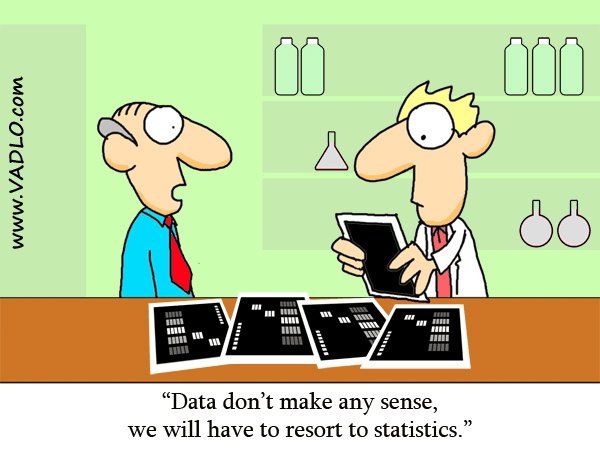

amf: the next part was inspired from a repository posted in the SL-K

https://www.kaggle.com/susree64/covid19-disease-progression-to-icu-xgboost

In [43]:
#from plotly.subplots import make_subplots
#import plotly.graph_objects as go
data1 = icu_first_window['GENDER'].value_counts()
data2 = icu_first_window['AGE_ABOVE65'].value_counts()
data3 = icu_first_window['AGE_PERCENTIL'].value_counts()
data4 = icu_first_window['IMMUNOCOMPROMISED'].value_counts()
data5 = icu_first_window['WINDOW'].value_counts()
fig = make_subplots(rows=1, cols=5, subplot_titles=('Gender', 'Age Above65','Age_group', 'ImmunoCompromised', 'Window'))

fig.add_trace(
    go.Bar(name = 'GENDER', x=data1.index, y = data1), row=1, col=1)

fig.add_trace(
    go.Bar(name = 'AGE_ABOVE65', x=data2.index, y=data2),row=1, col=2,)

fig.add_trace(
    go.Bar(name = 'AGE_PERCENTIL', x=data3.index, y=data3),row=1, col=3)

fig.add_trace(
    go.Bar(name = 'IMMUNOCOMPROMISED', x=data4.index, y=data4),row=1, col=4)

fig.add_trace(
    go.Bar(name = 'WINDOW', x=data5.index, y=data5),row=1, col=5)

fig.update_xaxes(title_text='Gender', row=1, col=1)
fig.update_xaxes(title_text='Age Above 65', row=1, col=2)
fig.update_xaxes(title_text='AGE_PERCENTIL', row=1, col=3)
fig.update_xaxes(title_text='ImmunoCompromised', row=1, col=4)
fig.update_xaxes(title_text='Window', row=1, col=5)


fig.update_layout(height=500, width=1200,title_text='General Feature - 195 Patients who entered ICU at any time during hospitalization')
fig.show()

In [44]:
icu_first_window.corr()

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,AGE_PERCENTIL,GENDER,IMMUNOCOMPROMISED,ICU,WINDOW
PATIENT_VISIT_IDENTIFIER,1.000000,-0.027848,0.032474,0.071725,0.002597,NaN,0.063372
AGE_ABOVE65,-0.027848,1.000000,0.860363,0.168244,0.163447,NaN,-0.119659
AGE_PERCENTIL,0.032474,0.860363,1.000000,0.196495,0.195233,NaN,-0.102493
GENDER,0.071725,0.168244,0.196495,1.000000,-0.088117,NaN,-0.034325
IMMUNOCOMPROMISED,0.002597,0.163447,0.195233,-0.088117,1.000000,NaN,0.108655
ICU,NaN,NaN,NaN,NaN,NaN,NaN,NaN
WINDOW,0.063372,-0.119659,-0.102493,-0.034325,0.108655,NaN,1.000000


#Profile of the patients transfered to ICU:

* Exact 50% of patients (195 out of 385) from the sl_k_original dataset where transfered to ICU.
* 50% (96 out of 195) were transfered to ICU beyound 6 hours from hospital check-in.
* 70% (135 out of 195) were male;
* 60% (119 out of 195) >= 65yo;
* 18% were immunocompromised

No potential correlation between the variables in the final 'icu_first_window' dataset was identified. Therefore no modeling.

**The only surprise:**

As a clinical research professional who closely followed up since the begning this covid-19 pandemic, in Europe, USA and Brasil, I was surprised by the relatively high 40% (76 out 195) proportion (or 20% out of the total of 385 patients) of younger of 65 yo in this sl__k_original dataset who were transfered to ICU. Particularly when we consider that this dataset covers only the very early months of the covid-19 outbreak.

Considering the evolution of the covid-19 vaccination plan and how now no-vaccinated younger age-groups are vulnerable to covid-19, it is a pity that most of the data made available in this sl_k_dataset is incorrect or useless from the clinical point of view.

How that can help our 'surgeon' here after?



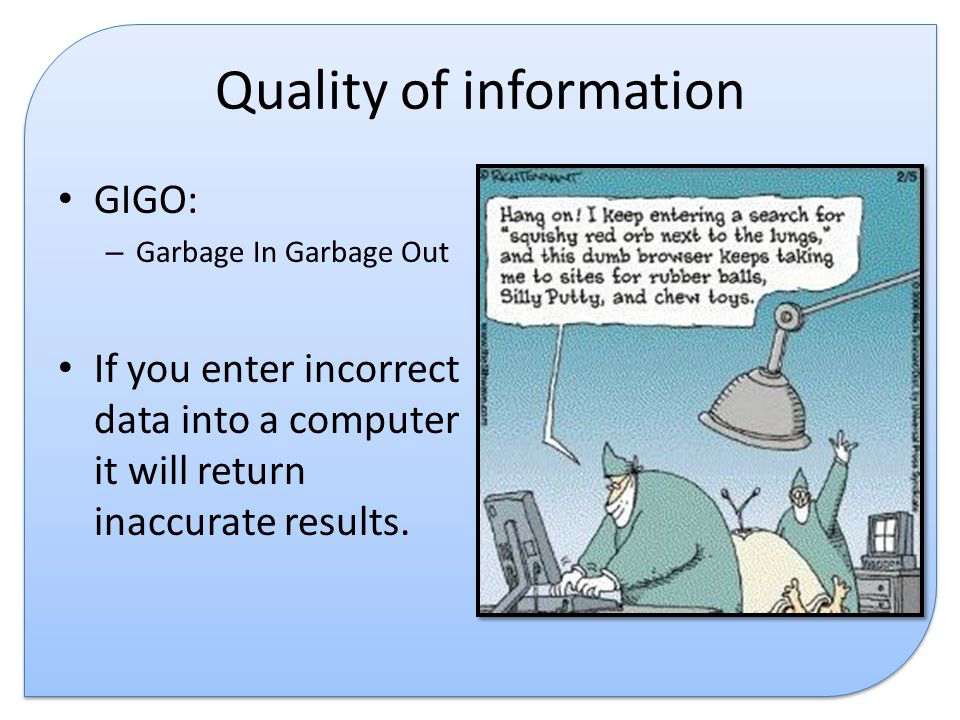